In [1]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../../")
import utils.utils as uti
import matplotlib.pyplot as plt

### Import data from WA

In [3]:
# Path to the uploaded CSV file and upload it
from corpus_preprocessing.preprocessWA import remove_extra_rows_WA
df_filtered_wa, conduct_cols  = remove_extra_rows_WA()
df_filtered_wa['rule16'] = np.nan

Percentage of samples kept: 69.48%


### Import data from NJ

In [4]:
from corpus_preprocessing.preprocessNJ import remove_extra_rows_NJ, extract_labels_rpc_NJ
df_filtered_nj = remove_extra_rows_NJ()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_nj.columns.values)):
    df_filtered_nj[str(i)+"_empty"] = np.nan
df_filtered_nj.columns = df_filtered_wa.columns.values

Percentage of samples kept: 11.99%


### Import data from GA

In [5]:
from corpus_preprocessing.preprocessGA import remove_extra_rows_GA
df_filtered_ga = remove_extra_rows_GA()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_ga.columns.values)):
    df_filtered_ga[str(i)+"_empty"] = np.nan
df_filtered_ga.columns = df_filtered_wa.columns.values

Percentage of rows kept: 57.32% 1042


### Import data from AZ

In [6]:
from corpus_preprocessing.preprocessAZ import preprocess_AZ
df_filtered_az = preprocess_AZ()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_az.columns.values)):
    df_filtered_az[str(i)+"_empty"] = np.nan
df_filtered_az.columns = df_filtered_wa.columns.values

Percentage of rows kept: 96.77%


### Import data from NC

In [7]:
from corpus_preprocessing.preprocessNC import preprocess_NC
df_filtered_nc = preprocess_NC()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_nc.columns.values)):
    df_filtered_nc[str(i)+"_empty"] = np.nan
df_filtered_nc.columns = df_filtered_wa.columns.values

Percentage of rows kept: 67.36% 1515


### Import data from MD

In [8]:
from corpus_preprocessing.preprocessMD import preprocess_MD
df_filtered_md = preprocess_MD()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_md.columns.values)):
    df_filtered_md[str(i)+"_empty"] = np.nan
df_filtered_md.columns = df_filtered_wa.columns.values

Percentage of rows kept: 10.95% 88


### Group the labels into 10 bins

In [9]:
dict_unique_conducts = {"1.1":1, "1.3":1, 
        "1.15":2, "1.15a":2, "1.15 (a)":2, "1.15A":2, "1.15 (A)":2,"1.15b":2,"1.15 (b)":2, "1.15B":2, "1.15 (B)":2,
        "1.4":3,
        "1.7":4, "1.8":4, "1.10":4, "1.11":4, "1.16":4, "1.17":4,
        "1.2":5, "1.5":5, "1.6":5, '1.9':5, "1.12":5, '1.13':5, '1.14':5,
        "2.1":6, "2.2":6, "2.3":6, "2.4":6, "3.1":6, "3.2":6, "3.3":6, "3.4":6, "3.5":6, "3.6":6, "3.7":6, "3.8":6, "3.9":6,
        "4.1":7, "4.2":7, "4.2.":7, "4.3":7, "4.4":7, "5.1":7, "5.2":7, "5.3":7, "5.4":7, "5.5":7, "5.6":7, "5.7":7,"5.8":7,
         "6.1":7, "6.2":7, "6.3":7, "6.4":7, "6.5":7, "7.1":7, "7.2":7, "7.3":7, "7.4":7, "7.5":7,"7.6":7,
        "8.4b":8, '8.4 (b)':8,
        "8.4c":9, '8.4 (c)':9,
        '8.1':10, '8.2':10, '8.4':10, '8.4a':10, '8.4 (a)':10, '8.4d':10, '8.4 (d)':10, '8.4e':10, '8.4 (e)':10, '8.4h':10, 
        '8.4 (h)':10, '8.4i':10, '8.4 (i)':10, '8.4j':10, '8.4 (j)':10, '8.4k':10, '8.4 (k)':10, '8.4l':10, '8.4 (l)':10, '8.4m':10, '8.4 (m)':10,
         '8.4n':10, '8.4 (n)':10, '8.5':10}

In [10]:
unique_bins = list(set(dict_unique_conducts.values()))

### Create list of dataframes

In [11]:
df_all_states = [df_filtered_wa.replace(dict_unique_conducts), df_filtered_nj.replace(dict_unique_conducts), df_filtered_ga.replace(dict_unique_conducts),
df_filtered_az.replace(dict_unique_conducts), df_filtered_nc.replace(dict_unique_conducts), df_filtered_md.replace(dict_unique_conducts)]

/var/folders/sv/qn9ckc8d6bs84hdk8qfbjcgh0000gn/T/ipykernel_84849/3240478085.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_all_states = [df_filtered_wa.replace(dict_unique_conducts), df_filtered_nj.replace(dict_unique_conducts), df_filtered_ga.replace(dict_unique_conducts),
/var/folders/sv/qn9ckc8d6bs84hdk8qfbjcgh0000gn/T/ipykernel_84849/3240478085.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered_az.replace(dict_unique_conducts), df_filtered_nc.replace(dict_unique_conducts), df_filtered_md.replace(dict_uniqu

### Preprocess Descriptions

In [12]:
# Preprocess data by converting text to lowercase, removing non-word characters and numbers, 
# excluding the specific word 'wsba', exclude single characters, tokenizing, removing stopwords, and applying lemmatization or stemming if method = "stemming"

preprocessed_descriptions_all_states = []
preprocessor = uti.TextPreprocessor(method='lemmatization')
for df in df_all_states:
    preprocessed_descriptions_all_states.append(df['Description'].apply(preprocessor.preprocess))

### Classification using logistic regression for each state separately

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [14]:
scores = np.zeros([len(preprocessed_descriptions_all_states), len(unique_bins)])
freq_label = np.zeros([len(preprocessed_descriptions_all_states), len(unique_bins)])
for i, preprocessed_description in enumerate(preprocessed_descriptions_all_states):
    # define testing set 
    df_test = df_all_states[i]
    # combine the rest of states into signle dataframe
    df_train = pd.concat([x for ii,x in enumerate(df_all_states) if ii!=i] , axis=0, ignore_index=True)
    # combine the rest of descriptions into single set
    x_train = list(np.concatenate([list(x.values) for ii,x in enumerate(preprocessed_descriptions_all_states) if ii!=i]))
    for j, label in enumerate(unique_bins):
        # index with(out) label for test data
        mask_test = df_test[conduct_cols].isin([label])
        test_with_label = df_test[mask_test].dropna(how='all').index.values.tolist()
        test_without_label = np.setdiff1d(np.array(preprocessed_description.index),np.array(test_with_label))
 
        # index with(out) label for train data
        mask_train = df_train[conduct_cols].isin([label])
        train_with_label = df_train[mask_train].dropna(how='all').index.values.tolist()
        train_without_label = np.setdiff1d(np.array(df_train.index),np.array(train_with_label))

        # frequency of label in TESTING set 
        freq_label[i, j] = len(test_with_label)/(len(test_with_label) + len(test_without_label))

        y_test = pd.DataFrame(np.append(np.ones(len(test_with_label)), np.zeros(len(test_without_label))),index = np.append(test_with_label, test_without_label))
        y_train = pd.DataFrame(np.append(np.ones(len(train_with_label)), np.zeros(len(train_without_label))),index = np.append(train_with_label, train_without_label))

        tfidf_vectorizer = TfidfVectorizer()
        tfidf_train_vectors = tfidf_vectorizer.fit_transform(x_train)
        tfidf_test_vectors = tfidf_vectorizer.transform(preprocessed_description.values)

        # run logistic regression on train data
        logreg=LogisticRegression()
        logreg.fit(tfidf_train_vectors, np.ravel(y_train.values))

        # estimate the accuracy of the model
        scores[i, j] = logreg.score(tfidf_test_vectors, y_test)

### Accuracy estimation of the log regression model

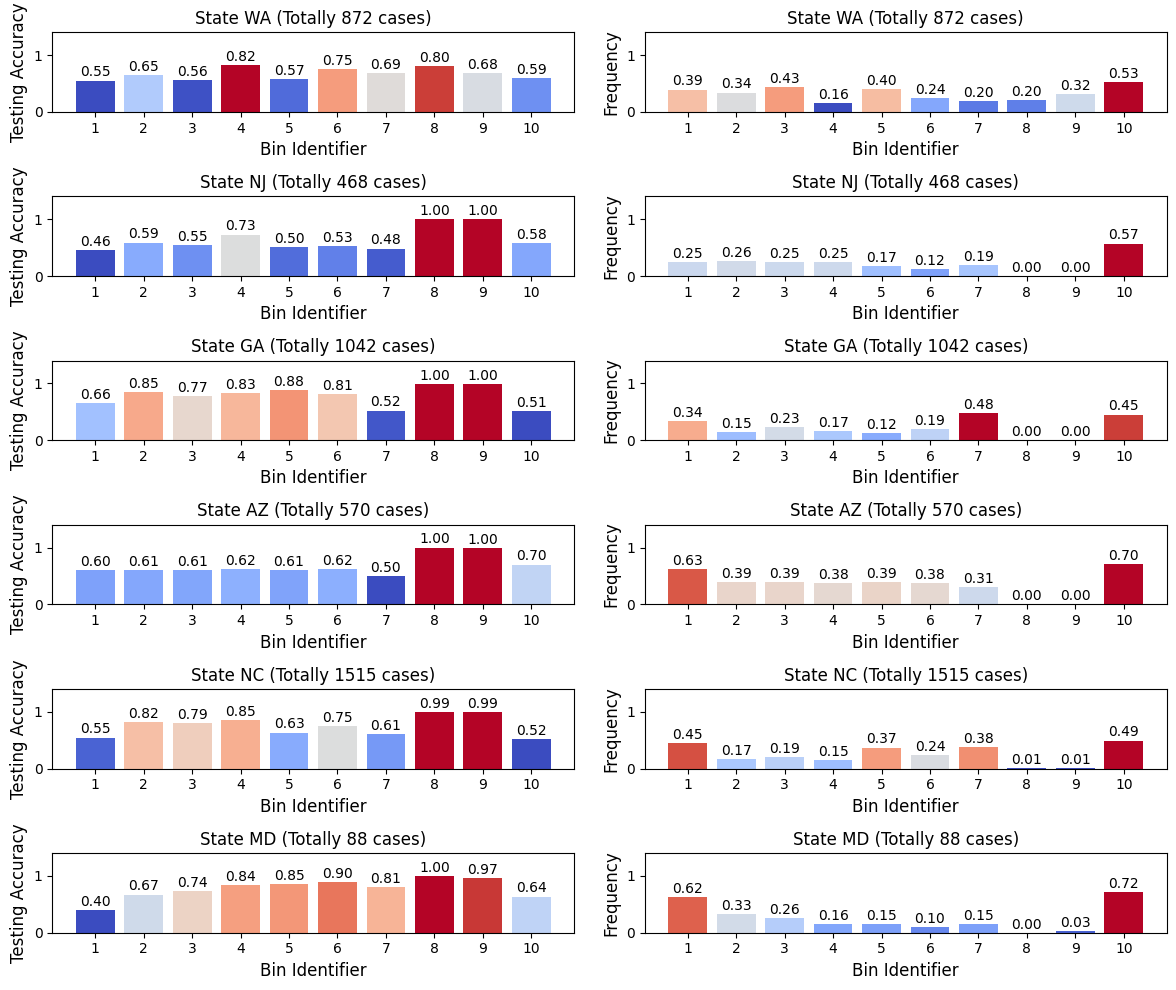

In [15]:
# Create a new figure with two subplots (side by side) including the exact frequency labels on top
import matplotlib.pyplot as plt

import matplotlib.cm as cm

states = ["WA", "NJ", "GA", "AZ", "NC", "MD"]

fig, ax = plt.subplots(len(preprocessed_descriptions_all_states), 2, figsize=(12, 10))

for i,_ in enumerate(preprocessed_descriptions_all_states):
    score = scores[i, :]
    colors = cm.coolwarm((score - min(score)) / (max(score) - min(score)))

    # Plot the original histogram with gradient colors (first subplot)
    ax[i,0].bar(unique_bins, score, color=colors, width=0.8, align='center')
    ax[i,0].set_xlabel("Bin Identifier", fontsize=12)
    ax[i,0].set_ylabel("Testing Accuracy", fontsize=12)
    ax[i,0].set_ylim(0, 1.4)
    ax[i,0].set_xticks(np.linspace(unique_bins[0],unique_bins[-1],len(unique_bins)))
    # Display the exact height above each bar
    for j, value in enumerate(score):
        ax[i,0].text(unique_bins[j], value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    ax[i,0].set_title("State " + states[i] + " (Totally " + str(len(df_all_states[i]))+ " cases)")

    # Plot the new histogram with frequency (second subplot)
    colors = cm.coolwarm((freq_label[i, :] - min(freq_label[i, :])) / (max(freq_label[i, :]) - min(freq_label[i, :])))
    ax[i,1].bar(unique_bins, freq_label[i, :], color=colors, width=0.8, align='center')
    ax[i,1].set_xlabel("Bin Identifier", fontsize=12)
    ax[i,1].set_ylabel("Frequency", fontsize=12)
    ax[i,1].set_ylim(0, 1.4)
    ax[i,1].set_xticks(np.linspace(unique_bins[0],unique_bins[-1],len(unique_bins)))
    # Display the exact frequency above each bar
    for j, value in enumerate(freq_label[i, :]):
        ax[i,1].text(unique_bins[j], value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    ax[i,1].set_title("State " + states[i] + " (Totally " + str(len(df_all_states[i]))+ " cases)")

    # Display the plot with both subplots

    plt.tight_layout()
plt.show()  # Show the complete plot with two subplots, with exact frequencies

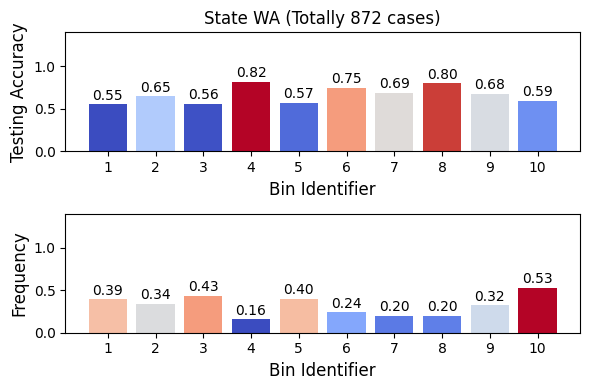

In [16]:
states = ["WA", "NJ", "GA", "AZ", "NC", "MD"]

fig, ax = plt.subplots(2, 1, figsize=(6, 4))

for i,_ in enumerate(preprocessed_descriptions_all_states):
    if i == 1:
        break
    score = scores[i, :]
    colors = cm.coolwarm((score - min(score)) / (max(score) - min(score)))

    # Plot the original histogram with gradient colors (first subplot)
    ax[i].bar(unique_bins, score, color=colors, width=0.8, align='center')
    ax[i].set_xlabel("Bin Identifier", fontsize=12)
    ax[i].set_ylabel("Testing Accuracy", fontsize=12)
    ax[i].set_ylim(0, 1.4)
    ax[i].set_xticks(np.linspace(unique_bins[0],unique_bins[-1],len(unique_bins)))
    # Display the exact height above each bar
    for j, value in enumerate(score):
        ax[i].text(unique_bins[j], value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    ax[i].set_title("State " + states[i] + " (Totally " + str(len(df_all_states[i]))+ " cases)")

    # Plot the new histogram with frequency (second subplot)
    colors = cm.coolwarm((freq_label[i, :] - min(freq_label[i, :])) / (max(freq_label[i, :]) - min(freq_label[i, :])))
    ax[i+1].bar(unique_bins, freq_label[i, :], color=colors, width=0.8, align='center')
    ax[i+1].set_xlabel("Bin Identifier", fontsize=12)
    ax[i+1].set_ylabel("Frequency", fontsize=12)
    ax[i+1].set_ylim(0, 1.4)
    ax[i+1].set_xticks(np.linspace(unique_bins[0],unique_bins[-1],len(unique_bins)))
    # Display the exact frequency above each bar
    for j, value in enumerate(freq_label[i, :]):
        ax[i+1].text(unique_bins[j], value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

    # Display the plot with both subplots

    plt.tight_layout()
plt.show()  # Show the complete plot with two subplots, with exact frequencies

In [17]:
np.mean(scores[0, :])

0.6647935779816514